<a href="https://colab.research.google.com/github/sgangoly/General-Relativity/blob/master/LIGO_GW/GW_Ch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q 'lalsuite==6.66' 'PyCBC==1.15.3'
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu

     |████████████████████████████████| 28.5MB 144kB/s 
     |████████████████████████████████| 3.1MB 45.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 1.6MB 36.5MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 798kB 42.8MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 2.7MB 49.6MB/s 
     |████████████████████████████████| 1.4MB 2.7MB/s 


In [0]:
%matplotlib inline
import numpy
import pylab
from pycbc.waveform import get_td_waveform
import pycbc.noise
import pycbc.psd
from pycbc.catalog import Merger
from pycbc.filter import highpass_fir, matched_filter
from pycbc.psd import welch, interpolate

In [3]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2020-06-04 06:56:31--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  3.74MB/s    in 1.0s    

2020-06-04 06:56:33 (3.74 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [0]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')
pyd = pycbc_strain

In [20]:
from gwpy.timeseries import TimeSeries
ts1 = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
print (ts1)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


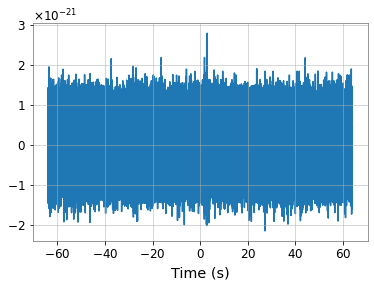

In [15]:
pylab.plot(pyd.sample_times, ts)
pylab.xlabel('Time (s)')
pylab.show()

In [0]:
! pip install -q 'gwpy==1.0.1'

In [0]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

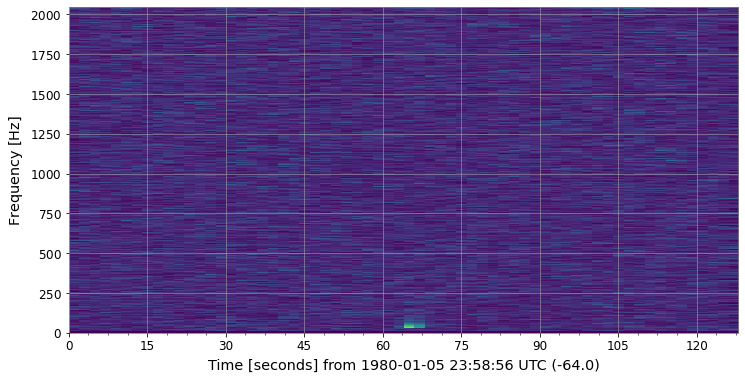

In [33]:
specgram = ts1.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

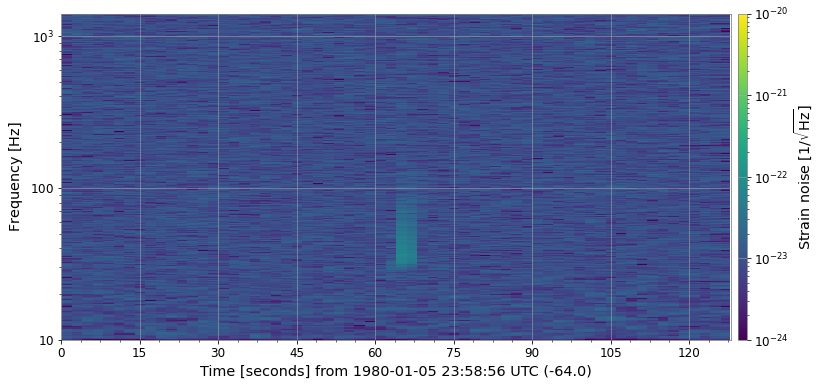

In [34]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

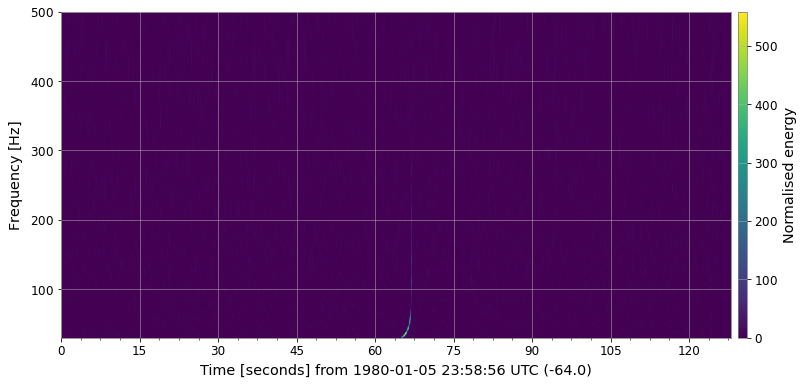

In [35]:
hq1 = ts1.q_transform(frange=(30, 500))
plot = hq1.plot()
plot.colorbar(label="Normalised energy")

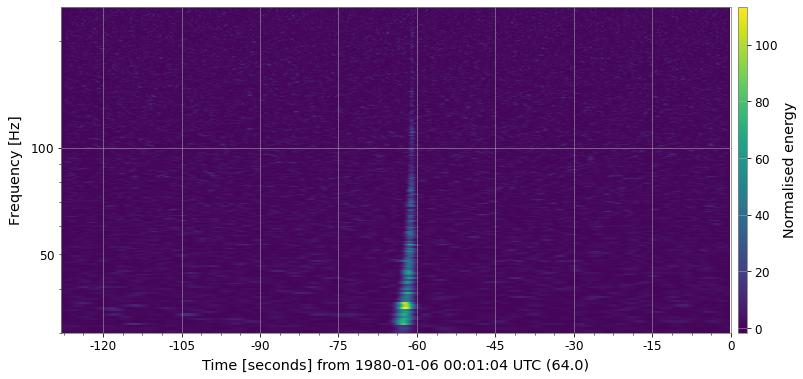

In [50]:
hq1 = ts1.q_transform(frange=(30, 250), qrange=(400, 410))
plot = hq1.plot()
ax = plot.gca()
ax.set_epoch(64)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")